<a href="https://colab.research.google.com/github/gibbsan/ResearchProject/blob/main/EducationResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
!pip install scikit-learn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import *

from sklearn.preprocessing import StandardScaler



In [38]:
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [37]:
import matplotlib.pyplot as plt

In [36]:
url = '/content/data.csv'
data = pd.read_csv(url, sep = ';')

In [35]:
data.shape

(4424, 37)

In [34]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [33]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [31]:
data.value_counts()

Marital status  Application mode  Application order  Course  Daytime/evening attendance\t  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate  GDP    Target  
6               39                2                  9147    1                             1                       133.1                           1            37                      37                      9                    9                    110.0            0          0                          0       1                        0       0                   47                 0              0                                    5                                    0                                       0                                    0.000000                          0                                               0                                    5                                    0                                       0                                    0.000000                          0                                               9.4                -0.8            -3.12  Dropout     1
1               1                 1                  171     1                             1                       110.0                           1            3                       2                       3                    3                    117.0            1          0                          0       1                        1       0                   21                 0              0                                    0                                    0                                       0                                    0.000000                          0                                               0                                    0                                    0                                       0                                    0.000000                          0                                               9.4                -0.8            -3.12  Graduate    1
                                                                                                                   114.0                           1            3                       29                      3                    5                    111.9            0          0                          0       0                        1       0                   18                 0              0                                    0                                    0                                       0                                    0.000000                          0                                               0                                    0                                    0                                       0                                    0.000000                          0                                               9.4                -0.8            -3.12  Dropout     1
                                                                                                                   115.0                           1            1                       1                       9                    9                    134.3            1          0                          0       1   

In [30]:
data.dtypes

,0
Marital status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance\t,int64
Previous qualification,int64
Previous qualification (grade),float64
Nacionality,int64
Mother's qualification,int64
Father's qualification,int64


In [29]:
data.size

163688

In [28]:
data['GDP'].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

In [27]:
data.index

RangeIndex(start=0, stop=4424, step=1)

In [26]:
data['Tuition fees up to date'].isnull()

,Tuition fees up to date
0,False
1,False
2,False
3,False
4,False
...,...
4419,False
4420,False
4421,False
4422,False


(4424, 37)

In [25]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [24]:
newData = data.rename(columns ={'Scholarship holder' : 'Obtained A Scholarship', ' Age at enrollment' : 'Age of Enrollment', 'Debtor' : 'In Debt', 'Application order': 'Application Order', 'Application mode': 'Application Mode', 'Marital status': 'Marital Status', 'Daytime/evening attendance\t': 'Daytime/Evening Attendance'})
newData.columns

Index(['Marital Status', 'Application Mode', 'Application Order', 'Course',
       'Daytime/Evening Attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'In Debt',
       'Tuition fees up to date', 'Gender', 'Obtained A Scholarship',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 

In [23]:
newData['Target']

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [22]:
newData.dropna()

,Marital Status,Application Mode,Application Order,Course,Daytime/Evening Attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [21]:
newData.shape

(4424, 37)

NameError: name 'newData' is not defined

In [14]:
newData['Obtained A Scholarship'].unique()

array([0, 1])

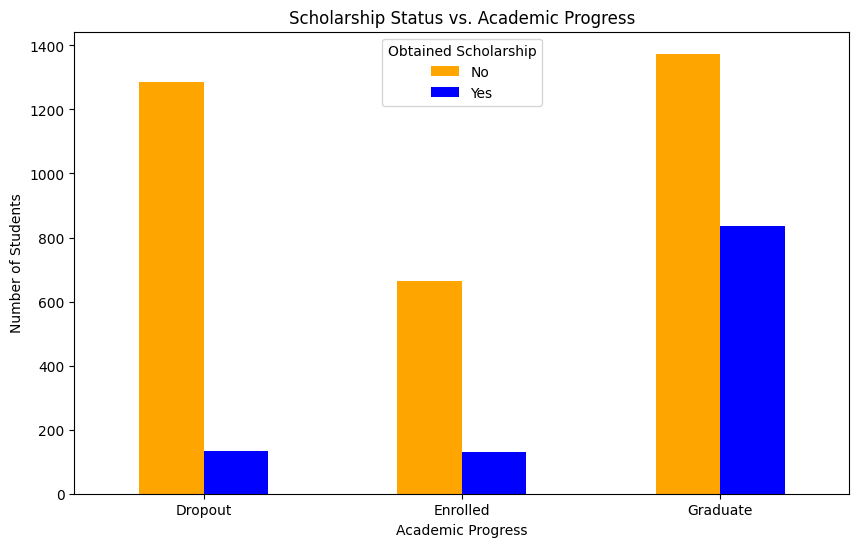

In [17]:
scholarshipCounts = newData.groupby('Target')['Obtained A Scholarship'].value_counts().unstack(fill_value=0)


scholarshipCounts.plot(kind='bar', figsize=(10, 6), color = ['Orange', 'Blue'])
plt.title('Scholarship Status vs. Academic Progress')
plt.xlabel('Academic Progress')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Obtained Scholarship', labels=['No', 'Yes'])
plt.show()

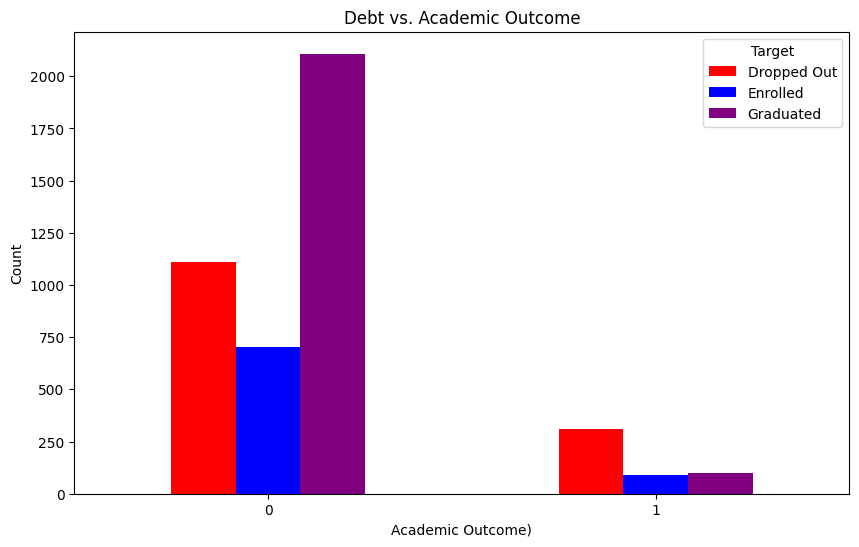

In [20]:
# 1 means in Debt and 0 means Not In Debt
DebtCounts = newData.groupby('In Debt')['Target'].value_counts().unstack(fill_value=0)


DebtCounts.plot(kind='bar', figsize=(10, 6), color = ['Red', 'Blue', 'Purple'])
plt.title('Debt vs. Academic Outcome')
plt.xlabel('Academic Outcome)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Target', labels=['Dropped Out', 'Enrolled', 'Graduated'])
plt.show()

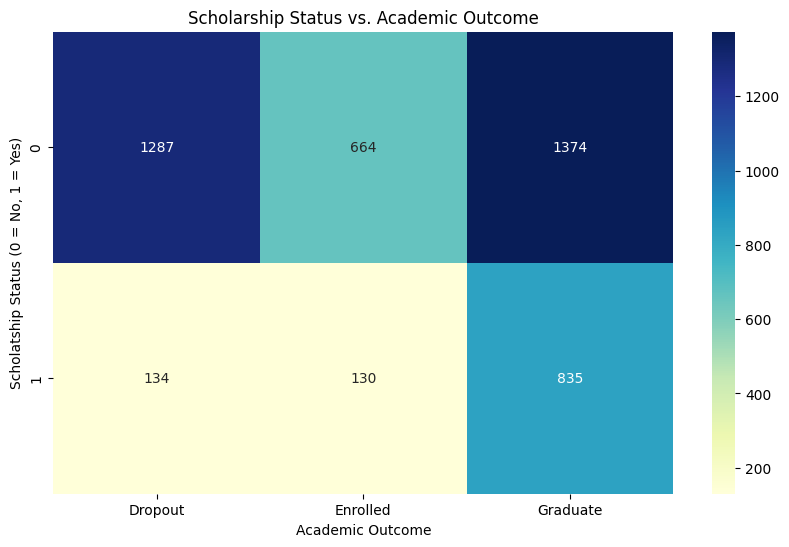

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

con = pd.crosstab(newData['Obtained A Scholarship'], newData['Target'])


plt.figure(figsize=(10,6))
sns.heatmap(con, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Scholarship Status vs. Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('Scholatship Status (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()

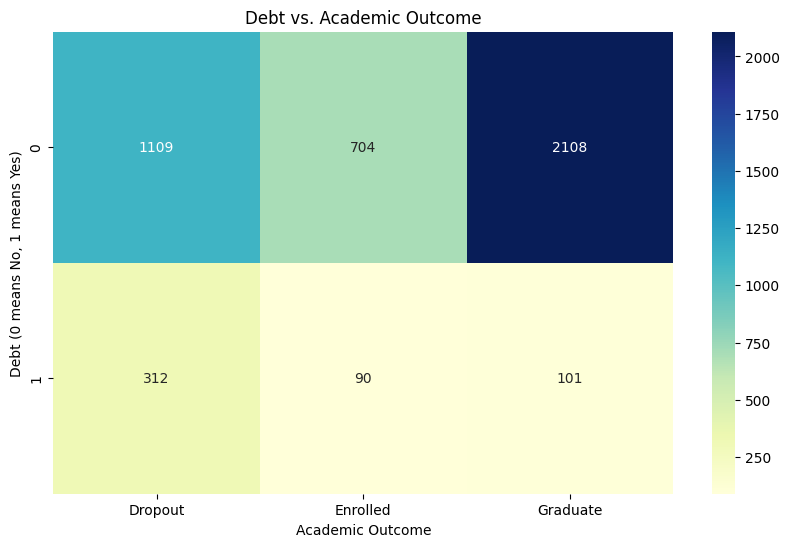

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

con = pd.crosstab(newData['In Debt'], newData['Target'])


plt.figure(figsize=(10,6))
sns.heatmap(con, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Debt vs. Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('Debt (0 means No, 1 means Yes)')
plt.xticks(rotation=0)
plt.show()

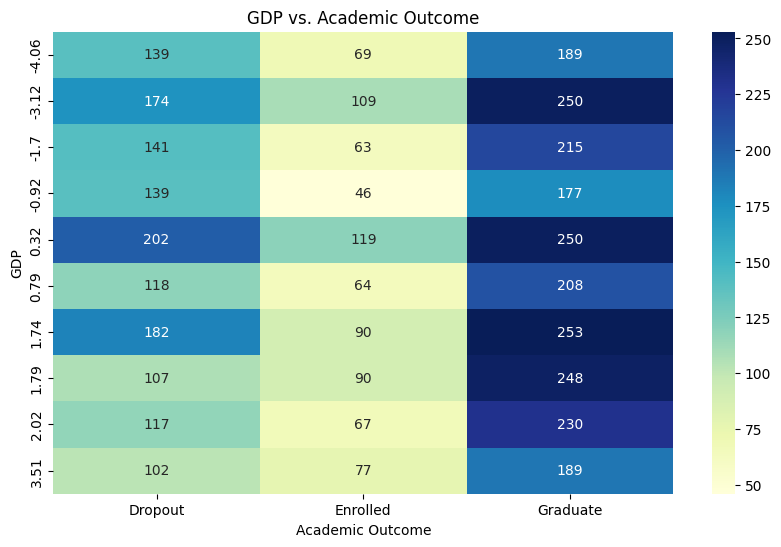

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

con = pd.crosstab(newData['GDP'], newData['Target'])


plt.figure(figsize=(10,6))
sns.heatmap(con, annot=True, fmt='d', cmap='YlGnBu')
plt.title('GDP vs. Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('GDP')
plt.xticks(rotation=0)
plt.show()

In [45]:
newData.columns

Index(['Marital Status', 'Application Mode', 'Application Order', 'Course',
       'Daytime/Evening Attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'In Debt',
       'Tuition fees up to date', 'Gender', 'Obtained A Scholarship',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 

In [46]:
newData.columns

Index(['Marital Status', 'Application Mode', 'Application Order', 'Course',
       'Daytime/Evening Attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'In Debt',
       'Tuition fees up to date', 'Gender', 'Obtained A Scholarship',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 

In [47]:
label = newData['Target']
features = newData[['Obtained A Scholarship', 'In Debt', 'Admission grade', 'Course','Curricular units 1st sem (grade)']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)



In [50]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [51]:
X_train_std

array([[-0.58311467, -0.35797753,  0.21735387,  0.14832098, -2.19189678],
       [ 1.71492856, -0.35797753, -1.16351918,  0.11873991,  0.21457761],
       [-0.58311467, -0.35797753, -0.25214297,  0.1115832 ,  0.73025069],
       ...,
       [ 1.71492856, -0.35797753, -0.97019696, -0.39224918,  0.73025069],
       [ 1.71492856, -0.35797753, -0.4454652 ,  0.19173835,  0.59273787],
       [-0.58311467, -0.35797753, -0.2866648 ,  0.13496178,  0.40709556]])

In [52]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

In [53]:
X_train_norm

array([[0.        , 0.        , 0.36842105, 0.91524402, 0.        ],
       [1.        , 0.        , 0.15789474, 0.90901788, 0.61810155],
       [0.        , 0.        , 0.29684211, 0.90751155, 0.75055188],
       ...,
       [1.        , 0.        , 0.18736842, 0.80146616, 0.75055188],
       [1.        , 0.        , 0.26736842, 0.92438241, 0.71523179],
       [0.        , 0.        , 0.29157895, 0.91243222, 0.66754967]])

In [54]:
X_train

,Obtained A Scholarship,In Debt,Admission grade,Course,Curricular units 1st sem (grade)
3383,0,0,130.0,9147,0.000000
2840,1,0,110.0,9085,11.666667
564,0,0,123.2,9070,14.166667
1786,0,0,103.5,9238,0.000000
3900,1,0,137.3,9500,13.900000
...,...,...,...,...,...
3444,0,0,127.7,9070,11.714286
466,0,0,131.3,9853,14.333333
3092,1,0,112.8,8014,14.166667
3772,1,0,120.4,9238,13.500000


In [55]:
model_unscaled = KNeighborsClassifier(n_neighbors=4)
model_unscaled.fit(X_train, y_train)

pred_unscaled = model_unscaled.predict(X_test)

print(accuracy_score(y_test,pred_unscaled))

0.6022598870056497


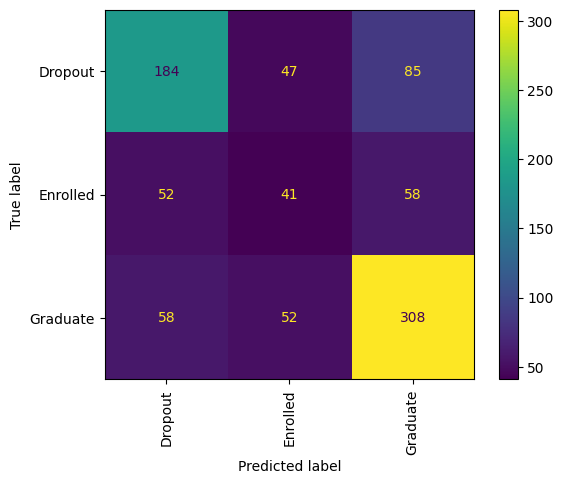

In [56]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_unscaled, display_labels = model_unscaled.classes_)
plt.xticks(rotation = 90)
plt.show()

In [57]:
model_norm= KNeighborsClassifier(n_neighbors=4)
model_norm.fit(X_train_norm, y_train)

pred_norm = model_norm.predict(X_test_norm)

print(accuracy_score(y_test,pred_norm))

0.5875706214689266


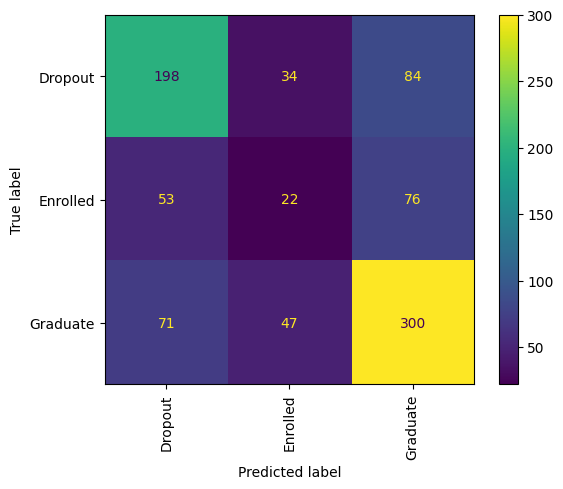

In [58]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_norm, display_labels = model_norm.classes_)
plt.xticks(rotation = 90)
plt.show()

In [59]:
model_std= KNeighborsClassifier(n_neighbors=4)
model_std.fit(X_train_std, y_train)

pred_std = model_std.predict(X_test_std)

print(accuracy_score(y_test,pred_std))

0.5932203389830508


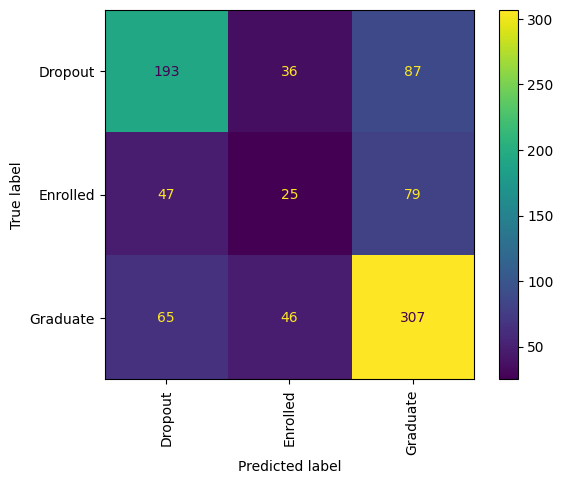

In [60]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred_std, display_labels = model_std.classes_)
plt.xticks(rotation = 90)
plt.show()

In [61]:

import pandas as pd
from scipy.stats import chi2_contingency




contingency_table = pd.crosstab(newData['In Debt'], newData['Target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

alpha = 0.05  # Level of Significance
if p < alpha:
  print("\nReject the null hypothesis. There is a statistically significant association between being in debt and the academic outcome.")
else:
  print("\nFail to reject the null hypothesis. There is no statistically significant association between being in debt and the academic outcome.")


Chi-Squared Test Results:
Chi-Squared Statistic: 259.33321964832965
P-value: 4.858552123231672e-57
Degrees of Freedom: 2
Expected Frequencies Table:
[[1259.43512658  703.72377939 1957.84109403]
 [ 161.56487342   90.27622061  251.15890597]]

Reject the null hypothesis. There is a statistically significant association between being in debt and the academic outcome.


In [62]:
chi2, p, dof, expected = chi2_contingency(contingency_table)


contingency_table = pd.crosstab(newData['Obtained A Scholarship'], newData['Target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)


alpha = 0.05  # level of Significance
if p < alpha:
  print("\nReject the null hypothesis. There is a statistically significant association between your scholarship status and the academic outcome.")
else:
  print("\nFail to reject the null hypothesis. There is no statistically significant association with your GDP and the academic outcome.")

Chi-Squared Test Results:
Chi-Squared Statistic: 409.94305544699375
P-value: 9.593930375514133e-90
Degrees of Freedom: 2
Expected Frequencies Table:
[[1067.99841772  596.75632911 1660.24525316]
 [ 353.00158228  197.24367089  548.75474684]]

Reject the null hypothesis. There is a statistically significant association between your scholarship status and the academic outcome.


In [63]:
chi2, p, dof, expected = chi2_contingency(contingency_table)


contingency_table = pd.crosstab(newData['GDP'], newData['Target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)


alpha = 0.05  # level of Significance
if p < alpha:
  print("\nReject the null hypothesis. There is a statistically significant association between your GDP and the academic outcome.")
else:
  print("\nFail to reject the null hypothesis. There is no statistically significant association with your GDP and the academic outcome.")

Chi-Squared Test Results:
Chi-Squared Statistic: 51.965049926087076
P-value: 3.788036506706529e-05
Degrees of Freedom: 18
Expected Frequencies Table:
[[127.51740506  71.25180832 198.23078662]
 [171.20094937  95.66048825 266.13856239]
 [134.58386076  75.20027125 209.21586799]
 [116.27531646  64.97016275 180.7545208 ]
 [183.40664557 102.48056058 285.11279385]
 [125.26898734  69.9954792  194.73553345]
 [168.63132911  94.22468354 262.14398734]
 [142.93512658  79.86663653 222.19823689]
 [132.9778481   74.30289331 206.71925859]
 [118.20253165  66.04701627 183.75045208]]

Reject the null hypothesis. There is a statistically significant association between your GDP and the academic outcome.
